In [2]:
import pandas as pd
import sklearn.model_selection as ms
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import Image
import sklearn.neighbors as neighbors
from sklearn import metrics

# Load dữ liệu

In [3]:
data_read = pd.read_csv('datingTestSet.txt')

In [4]:
data_read.head()

,fly,videogames,icecream,likes
0,40920,8.326976,0.953952,largeDoses
1,14488,7.153469,1.673904,smallDoses
2,26052,1.441871,0.805124,didntLike
3,75136,13.147394,0.428964,didntLike
4,38344,1.669788,0.134296,didntLike


# Tạo mảng X_train, Y_train và X_test Y_test 

In [5]:
  X = data_read[['fly', 'videogames', 'icecream']]
  y = data_read.likes

In [6]:
X_train, X_test, y_train, y_test = ms.train_test_split(X, y, test_size=0.2, random_state=4)

# Câu 2: Vẽ đồ thị cho tập train

 * Fly với videos game
 * Fly với ice cream
 * Videos game với ice cream

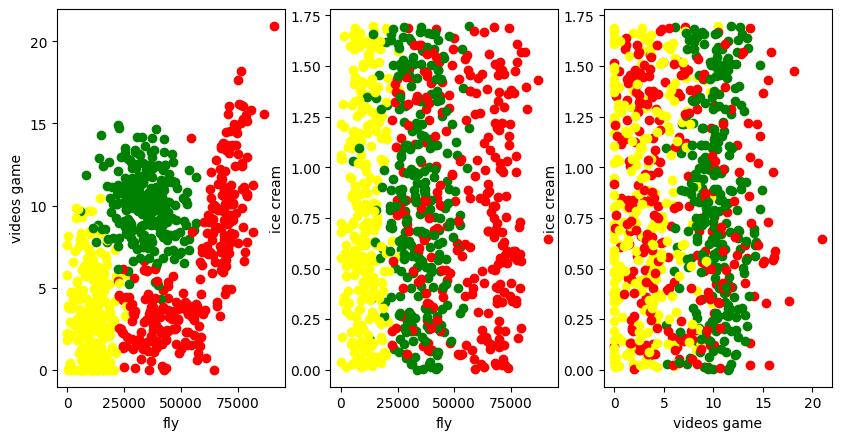

In [8]:
fig,axes = plt.subplots(nrows=1, ncols=3, figsize=(10,5), dpi=100)
for i in X_train.index:
    if y_train[i] == 'largeDoses':
        color = 'green'
    elif y_train[i] == 'smallDoses':
        color = 'yellow'
    else:
        color = 'red'
    
    axes[0].scatter(X_train['fly'][i], X_train['videogames'][i], color=color, )
    
    axes[1].scatter(X_train['fly'][i], X_train['icecream'][i], color=color)
    
    axes[2].scatter(X_train['videogames'][i], X_train['icecream'][i], color=color)

axes[0].set_xlabel('fly')
axes[0].set_ylabel('videos game')
axes[1].set_xlabel('fly')
axes[1].set_ylabel('ice cream')
axes[2].set_xlabel('videos game')
axes[2].set_ylabel('ice cream')
plt.show()

## Dữ liệu 3 feature nên mình sẽ thử vẽ 3d xem cho rõ ràng hơn


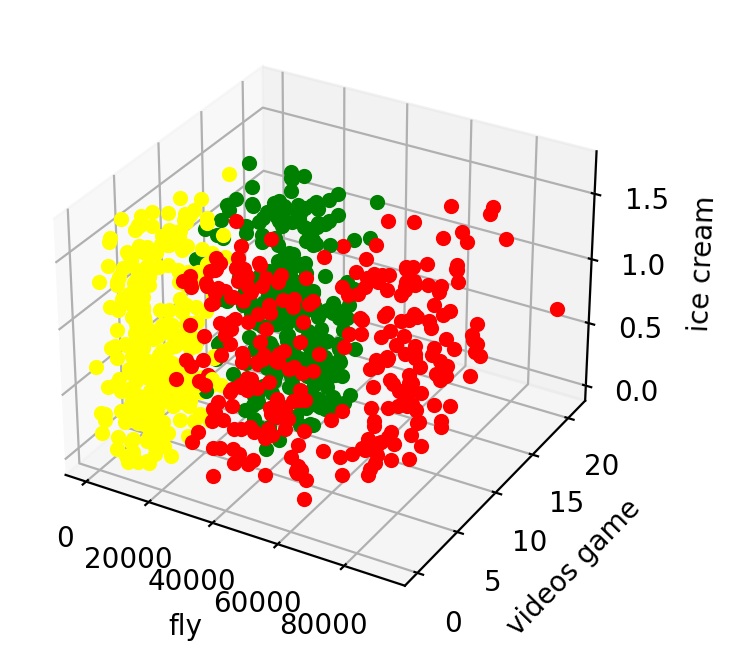

In [10]:
fig = plt.figure(dpi=200)
ax = fig.add_subplot(111, projection='3d')
for i in X_train.index:
    if y_train[i] == 'largeDoses':
        color = 'green'
    elif y_train[i] == 'smallDoses':
        color = 'yellow'
    else:
        color = 'red'
    
    ax.scatter(X_train['fly'][i], X_train['videogames'][i], X_train['icecream'][i], color=color)

ax.set_xlabel('fly')
ax.set_ylabel('videos game')
ax.set_zlabel('ice cream')
plt.show()


# Câu 3: Train và đánh giá độ chính xác trên tập test

In [11]:
knn = neighbors.KNeighborsClassifier(n_neighbors=20)
knn.fit(X_train.values, y_train) # X_train.values fix for warning b/c X_train is dataframe and it have label

KNeighborsClassifier(n_neighbors=20)

In [12]:
y_pred = knn.predict(X_test.values)

In [13]:
print(metrics.confusion_matrix(y_test,y_pred))
print("------------------------")
print( "Accuracy : " + str(np.round(metrics.accuracy_score(y_test,y_pred),4)))

[[50 18  0]
 [12 43  8]
 [ 0  0 69]]
------------------------
Accuracy : 0.81


# Câu 4 Tìm k tốt nhất sử dụng GridSearchCV và test lại với k tốt nhất

In [14]:
k_grid = np.arange(1,100,2)
parameters = {'n_neighbors':k_grid}
gridCV = ms.GridSearchCV(neighbors.KNeighborsClassifier(), parameters)
gridCV.fit(X_train.values, y_train)
best_k = gridCV.best_params_['n_neighbors']
print("Best k : " + str(best_k))

Best k : 79


In [17]:
knn79 = neighbors.KNeighborsClassifier(n_neighbors=79)
knn79.fit(X_train.values, y_train)
y_pred_new = knn79.predict(X_test.values)

In [18]:
print(metrics.confusion_matrix(y_test,y_pred_new))
print("------------------------")
print( "Accuracy : " + str(np.round(metrics.accuracy_score(y_test,y_pred_new),4)))

[[47 21  0]
 [ 5 50  8]
 [ 0  0 69]]
------------------------
Accuracy : 0.83
